Average cases vs peaks of coronavirus cases in Piemonte
March 19 to April 14

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

In [30]:
def PoissonVal(n,lam):
    '''
    Returns value of the Poisson distribution with average lam at n.
    Uses np.power and scipy.special.factorial to vectorize
    '''
    return np.exp(-lam)*np.power(lam,n)/scipy.special.factorial(n)

def BigPoissonVal(n,lam):
    '''
    Returns value of the Poisson distribution with average lam at n
    for large value of n using Stirling's Formula for the factorial
    '''
    t=-lam+n*np.log(lam/n)+n-np.log(2*np.pi*n)/2
    return np.exp(t)

def GaussVal(x,mu,sigma):
    return np.exp(-((x-mu)/sigma)**2/2)/sigma/np.sqrt(2*np.pi)

In [9]:
data=np.array([591,529,291,668,441,654,509,510,558,579,535,506,589,494,558,543,813,653,562,419,540,639,490,996,652,474,556])
ave=data.mean()
print('mean:',ave)
error_gauss=data.std()
error_poisson=np.sqrt(ave)
print('error_gauss:',error_gauss)
print('error_poisson:',error_poisson)

mean: 568.4814814814815
error_gauss: 126.42590286932395
error_poisson: 23.84284969296836


In [27]:
BigPoissonVal(996,568.5)

1.6140518721667875e-59

In [28]:
BigPoissonVal(291,568.5)

3.061621747882024e-38

Test

In [25]:
PoissonVal(10,20)

0.005816306518345136

In [26]:
BigPoissonVal(10,20)

0.005864962011195219

In [17]:
np.power(2,3)

8

In [18]:
scipy.special.factorial(20)

array(2.43290201e+18)

In [21]:
np.exp(20*np.log(20)-20+np.log(2*np.pi*20)/2)

2.422786846761116e+18

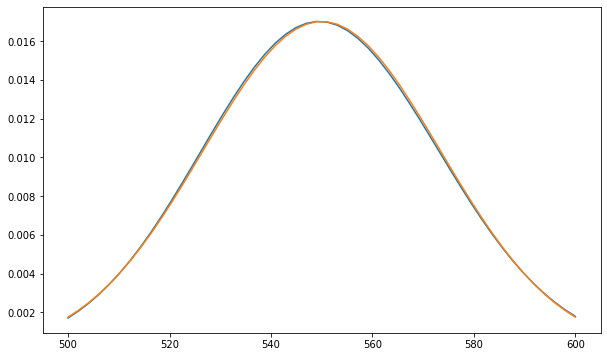

In [32]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(10,6))
xx=np.linspace(500,600)
ax.plot(xx,BigPoissonVal(xx,550))
ax.plot(xx,GaussVal(xx,550,np.sqrt(550)))

### Prova plot eq trascendente

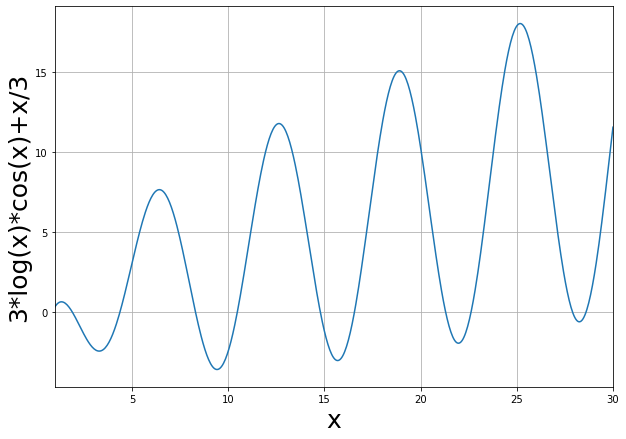

In [28]:
import matplotlib.pyplot as plt
import numpy as np

def my_f(x):
    return 3*np.log(x)*np.cos(x)+x/3

fig,ax = plt.subplots(figsize=(10,7))
xx=np.linspace(1,30,600)
ax.plot(xx,my_f(xx))
ax.set_xlim(1,30)
ax.set_xlabel('x', fontsize=25)
ax.set_ylabel('3*log(x)*cos(x)+x/3', fontsize=25)
ax.grid(b=True,which='both')
plt.savefig('TrascendentEq.jpg', pad_inches=1.1)

### Test della generazione Monte Carlo di punti secondo una distribuzione data 

In [4]:
import numpy as np

def generate_f(f,a,b,max):
    '''
    Generate random points distributed according to an input distribution
    Input:
    f: the probability distribution
    a,b: extrema of the range for the desired random number
    max: a real number such that f(x) < max for each x
    Returns:
    ranval: random number
    '''
    not_found=True
    while not_found:
        x=np.random.uniform(a,b)
        y=np.random.uniform(0,max)
        if f(x)>y:
            not_found=False
    
    return x
    

#### Esempio 1

In [5]:
def f1(x):
    if x < 0.5:
        val=0.6
    else:
        val=1.4
    
    return val
    

In [7]:
#npoints=1000
npoints = 1000000
xval = [generate_f(f1,0,1,2) for n in range(npoints)]
x1val=[x for x in xval if x < 0.5]
x2val=[x for x in xval if x > 0.5]

print("Numero di punti in [0,0.5]:",len(x1val))
print("Numero di punti in [0.5,1]:",len(x2val))
print("rapporto fra i numeri di punti:",len(x2val)/len(x1val),"rapporto atteso=7/3:",7/3)

Numero di punti in [0,0.5]: 299487
Numero di punti in [0.5,1]: 700513
rapporto fra i numeri di punti: 2.3390430970292533 rapporto atteso=7/3: 2.3333333333333335


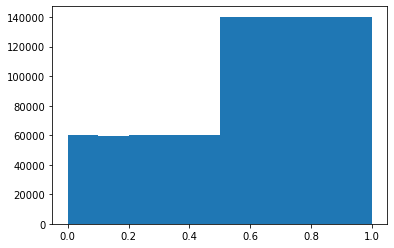

In [8]:
import matplotlib.pyplot as plt
nbins = 10
xrange = (0,1)

fig, ax = plt.subplots()
nevent, bins, patches = ax.hist(xval, nbins, range=xrange)

#### Esempio 2

In [9]:
def f2(x):
    val=3./8.*(1+x**2)
    
    return val    

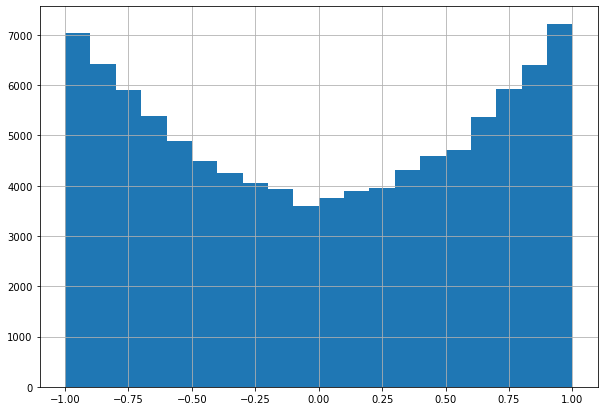

In [11]:
#npoints=1000
npoints = 100000
xval = [generate_f(f2,-1,1,1) for n in range(npoints)]

nbins = 20
xrange = (-1,1)

fig, ax = plt.subplots(figsize=(10,7))
nevent, bins, patches = ax.hist(xval, nbins, range=xrange)
ax.grid(True)

### Fissare il seme dei numeri casuali per riprodurre risultati

In [8]:
np.random.seed(12345)

In [9]:
np.random.random(10)

array([0.92961609, 0.31637555, 0.18391881, 0.20456028, 0.56772503,
       0.5955447 , 0.96451452, 0.6531771 , 0.74890664, 0.65356987])

In [10]:
np.random.random(10)

array([0.74771481, 0.96130674, 0.0083883 , 0.10644438, 0.29870371,
       0.65641118, 0.80981255, 0.87217591, 0.9646476 , 0.72368535])

In [11]:
np.random.seed(12345)
np.random.random(10)

array([0.92961609, 0.31637555, 0.18391881, 0.20456028, 0.56772503,
       0.5955447 , 0.96451452, 0.6531771 , 0.74890664, 0.65356987])

In [4]:
import numpy as np

# reshape
x = np.array([[1,2,3],[4,5,6]])
x.shape

(2, 3)

In [6]:
y=x.reshape(3,2)
y

array([[1, 2],
       [3, 4],
       [5, 6]])

### Numpy:reference vs view (shallow copy) vs copy (deep copy)

#### Reference

In [45]:
x = np.array([[1,2,3],[4,5,6]])
y=x

Se modifico un elemento di `x`, lo cambio anche in `y`

In [46]:
x[0][1]=33
y

array([[ 1, 33,  3],
       [ 4,  5,  6]])

Se modifico un elemento di `y`, lo cambio anche in `x`

In [47]:
y[1][1]=44
x

array([[ 1, 33,  3],
       [ 4, 44,  6]])

In [9]:
x=x.reshape(1,6)
x

array([[ 1, 33,  3,  4,  5,  6]])

In [10]:
y

array([[ 1, 33],
       [ 3,  4],
       [ 5,  6]])

#### view: changing `x` is equivalent to changing `y`

In [29]:
x = np.array([[1,2,3],[4,5,6]])
y=x.view()

In [30]:
y

array([[1, 2, 3],
       [4, 5, 6]])

In [48]:
x[0][1]=33
y[1][1]=44
print(x)
print(y)

[[ 1 33  3]
 [ 4 44  6]]
[[ 1 33  3]
 [ 4 44  6]]


In [31]:
# I loro id sono differenti
print(id(x))
print(id(y))

4622939600
4622939920


In [32]:
x[0][1]=33
y

array([[ 1, 33,  3],
       [ 4,  5,  6]])

In [33]:
x=x.reshape(1,6)
x

array([[ 1, 33,  3,  4,  5,  6]])

In [34]:
y

array([[ 1, 33,  3],
       [ 4,  5,  6]])

In [22]:
# Gli id dei singoli elementi sono gli stessi 
print(id(x[0][1]))
print(id(y[0][1]))

4508486608
4508486608


 Copiare con range a=b[:] crea una shallow copy
 
 La funzione np.copy crea un oggetto nuovo con lo stesso contenuto

In [19]:
x = np.array([[1,2,3],[4,5,6]])
y=x.copy()

In [20]:
# I loro id sono differenti
print(id(x))
print(id(y))

4622939040
4622938160


In [27]:
x[0][1]=33
print('x:',x)
print('y:',y)

x: [[ 1 33  3]
 [ 4  5  6]]
y: [[1 2 3]
 [4 5 6]]


In [28]:
# Gli id dei singoli elementi sono differenti
print(id(x[0][1]))
print(id(y[0][1]))
print(id(x[0][2]))
print(id(y[0][2]))

4759859896
4759859896
4759859896
4759859896


Slicing gives a view, indexing gives a deep copy?????

In [39]:
a=np.array([1,2,3])
b=a[:]
#c[:]=a[:]

In [41]:
print(id(a))
print(id(b))
#id(c)

4748353328
4748953520


In [42]:
a[2]=44

In [43]:
print(a)
print(b)

[ 1  2 44]
[ 1  2 44]
